In [1]:
import json
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
data_path = '/volumes/transcend/data/hold_data.csv'
data = pd.read_csv(data_path)

/Users/emrys/repos/safeboardml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### подготовка даты: нужно избавиться от inf, nan, и закодировать данные типа str

In [3]:
from custom import preprocessingData

In [4]:
preprocessingData(data)

### делает список из строк json чтобы потом записать в текстовый файл

In [5]:
json_string_list = []

for row in data.iterrows():
    json_string = json.dumps(row[1].to_dict()) # 1 потому что на 0 находится индекс, он не нужен
    json_string_list.append(json_string)

In [10]:
json_string_list = json_string_list[:100] # чтобы проверить быстрее работает ли
json_string_list += ['stop\n']
input_string = '\n'.join(json_string_list)

In [11]:
script_input_path = './data/script_input.txt'
with open(script_input_path, 'w') as file:
    file.write(input_string)

In [12]:
python_path = 'python3'
script_path = './my_malware_detector.py'

In [13]:
%%time

import subprocess # для макоси рекомендовали использовать вместо os
output = subprocess.check_output(f'cat {script_input_path} | {python_path} {script_path}', shell=True)

CPU times: user 2.85 ms, sys: 10.7 ms, total: 13.5 ms
Wall time: 4.34 s


In [11]:
res = output.decode("utf-8").replace('[', '').replace(']', '')

In [12]:
res = res.split('\n')

In [13]:
res = res[2:]

In [14]:
res.pop()

''

In [15]:
res = [float(i) for i in res]

In [16]:
from malware_ml.visualization import plot_roc_curve
import matplotlib.pyplot as plt
columns = data.columns

### приминение модели QuadraticDiscriminantAnalysis

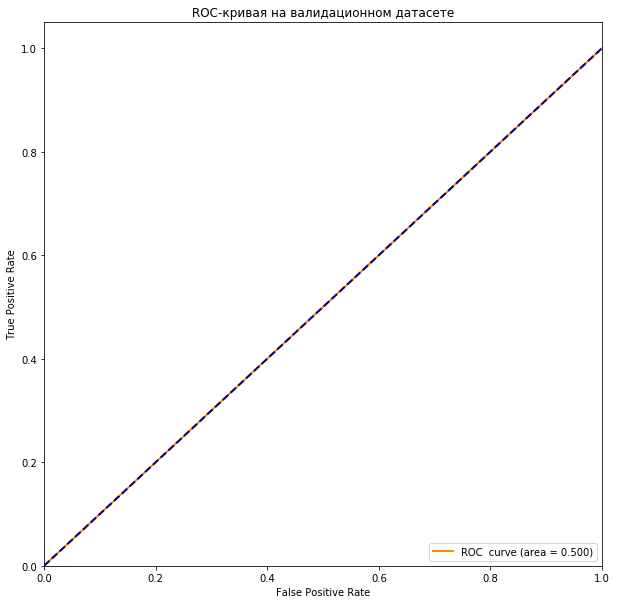

In [88]:
plt.figure(figsize=(10,10))
plot_roc_curve(true=data[columns[-1]],
               pred=res,
               name='ROC-кривая на "придерженном" датасете')

### приминение модели DecisionTreeClassifier

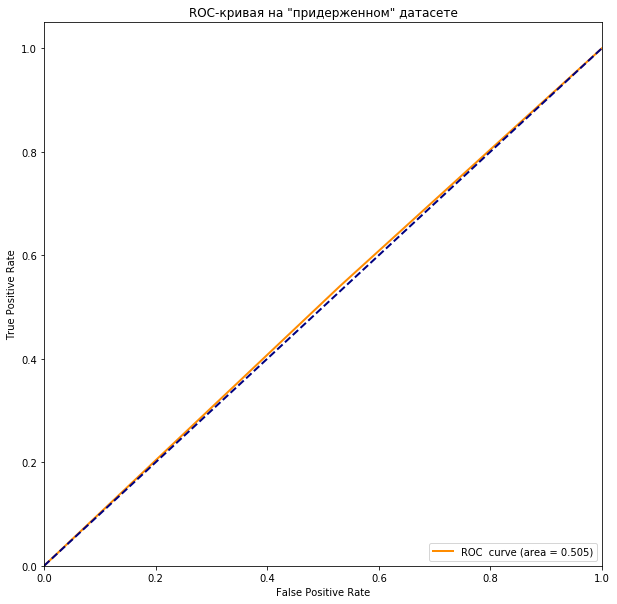

In [17]:
plt.figure(figsize=(10,10))
plot_roc_curve(true=data[columns[-1]],
               pred=res,
               name='ROC-кривая на "придерженном" датасете')

### как видно, несмотря на то, что модель QuadraticDiscriminantAnalysis показала лучшие результаты на "придерженном" датасете лучше всего показала себя модель DecisionTreeClassifier